In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Pre-requisite = python - 3.6 and tensorflow - 2.0 +

print(tensorflow.__version__)

2.11.0


In [3]:
# Loading the data

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


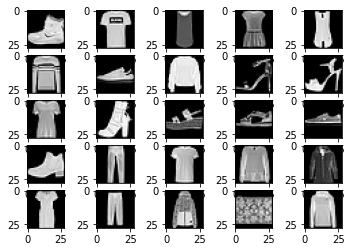

<Figure size 864x576 with 0 Axes>

In [4]:
# Visualizing the Dataset

for i in range(25):
    # define subplot
    plt.subplot(5, 5, i+1)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

# show the figure
plt.figure(figsize=(12,8))
plt.show()

In [5]:
# Normalizing the images

X_train = X_train/255
X_test = X_test/255

In [6]:
# Building the model

model = Sequential([
                  
    #flattening the images
    Flatten(input_shape=(28,28)),

    #adding first hidden layer
    Dense(256, activation='relu'),

    #adding second hidden layer
    Dense(128, activation='relu'),

    #adding third hidden layer
    Dense(64, activation='relu'),

    #adding output layer
    Dense(10, activation='softmax')
])

In [7]:
# Compiling the model

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the model

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.4855 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3621 - accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3286 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3061 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2882 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2604 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2514 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2435 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [8]:
# Evaluating the model

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3273 - accuracy: 0.8893


[0.32733026146888733, 0.8892999887466431]

In [ ]:
'''
Now lets tune the following hyperparameter in model -

1. Number of hidden layers
2. Number of neurons in each hidden layers
3. Learning rate
4. Activation Function
'''


'\nNow lets tune the following hyperparameter in model -\n\n1. Number of hidden layers\n2. Number of neurons in each hidden layers\n3. Learning rate\n4. Activation Function\n'

In [9]:
# Use this command to install Keras tuner

! pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.7 MB/s eta 0:00:00


In [10]:
# Installing the required libraries

from tensorflow import keras
from keras_tuner import RandomSearch

In [11]:
# Defining function to biuld the model

def build_model(hp):          # hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape = (28,28)))

    # Providing range for number of neurons in a hidden layer
    model.add(Dense(units = hp.Int('num_of_neurons', min_value = 32, max_value = 512, step = 32),
                                    activation ='relu'))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compiling the model
    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values = [1e-2, 1e-3, 1e-4])),
                  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [12]:
#feeding the model and parameters to Random Search

tuner = RandomSearch(build_model,
                    objective = 'val_accuracy',
                    max_trials = 5,
                    executions_per_trial = 3,
                    directory = 'tuner1',
                    project_name = 'Clothing')

# So this will run for (5*3)= 15 times with 10 epochs

In [13]:
# This tells us how many hyperparameter we are tuning
# in our case it's 2 = neurons, learning rate

tuner.search_space_summary()

Search space summary
Default search space size: 2
num_of_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [14]:
# Fitting the tuner on train dataset

tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Trial 5 Complete [00h 03m 46s]
val_accuracy: 0.8761666615804037

Best val_accuracy So Far: 0.8878333369890848
Total elapsed time: 00h 18m 46s


In [15]:
# We can see the hyperparameters which is been selected by KerasTuner

tuner.results_summary()

Results summary
Results in tuner1/Clothing
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_neurons: 352
learning_rate: 0.001
Score: 0.8878333369890848
Trial summary
Hyperparameters:
num_of_neurons: 192
learning_rate: 0.001
Score: 0.8862000107765198
Trial summary
Hyperparameters:
num_of_neurons: 512
learning_rate: 0.0001
Score: 0.8761666615804037
Trial summary
Hyperparameters:
num_of_neurons: 256
learning_rate: 0.0001
Score: 0.8719666798909506
Trial summary
Hyperparameters:
num_of_neurons: 64
learning_rate: 0.01
Score: 0.8503333330154419


In [ ]:
'''
Now lets tune some more parameters - 

Now we will provide the range of the number of the layers to be 
used in the model which is between 2 to 20
'''

'\nNow lets tune some more parameters - \nNow we will provide the range of the number of the layers to be \nused in the model which is between 2 to 20\n'

In [16]:
def build_model(hp):                 # Hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape = (28,28)))

    # Providing the range for hidden layers  
    for i in range(hp.Int('num_of_layers', 2, 20)):         
        # Providing range for number of neurons in hidden layers
        model.add(Dense(units = hp.Int('num_of_neurons'+ str(i), min_value=32, max_value = 512, step = 32),
                                    activation = 'relu'))
        
    model.add(Dense(10, activation = 'softmax'))    # Output layer
    
    #  Compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),   #tuning learning rate
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [17]:
# Feeding the model and parameters to Random Search

tuner=RandomSearch(build_model,
                  objective = 'val_accuracy',
                  max_trials = 5,
                  executions_per_trial = 3,
                  directory = 'project',
                  project_name = 'Clothing')

In [18]:
# Tells us how many hyperparameters we are tuning
# in our case it's 3 = layers, neurons, learning rate

tuner.search_space_summary()

Search space summary
Default search space size: 4
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [19]:
# Fitting the tuner on train dataset

tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Trial 5 Complete [00h 05m 33s]
val_accuracy: 0.8749000032742819

Best val_accuracy So Far: 0.8842666546503702
Total elapsed time: 00h 27m 06s


In [20]:
# We can see the hyperparameters which is been selected by KerasTuner

tuner.results_summary()

Results summary
Results in project/Clothing
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_layers: 3
num_of_neurons0: 448
num_of_neurons1: 192
learning_rate: 0.001
num_of_neurons2: 32
Score: 0.8842666546503702
Trial summary
Hyperparameters:
num_of_layers: 10
num_of_neurons0: 224
num_of_neurons1: 288
learning_rate: 0.001
num_of_neurons2: 224
num_of_neurons3: 192
num_of_neurons4: 32
num_of_neurons5: 256
num_of_neurons6: 480
num_of_neurons7: 192
num_of_neurons8: 256
num_of_neurons9: 352
num_of_neurons10: 32
num_of_neurons11: 224
num_of_neurons12: 384
num_of_neurons13: 224
num_of_neurons14: 128
num_of_neurons15: 32
num_of_neurons16: 32
Score: 0.8749000032742819
Trial summary
Hyperparameters:
num_of_layers: 16
num_of_neurons0: 192
num_of_neurons1: 128
learning_rate: 0.0001
num_of_neurons2: 224
num_of_neurons3: 32
num_of_neurons4: 32
num_of_neurons5: 32
num_of_neurons6: 32
num_of_neurons7: 32
num_of_neurons8: 32
num_of_neurons9: 32
num_of_neurons10: 32
num_of_neurons11: 32
num_